# TM PROJECT NOTEBOOK


Group number: `3`

Group members:
1. `Alex Santander: 20220658`
2. `Janaina Santos: 20220640`
3. `Inês Rocha: 20220052`
4. `Skander Chaabini: 20221041`


### INDEX

[<font color='#bfd532'>1. Import Packages</font>](#imports) <br>
[<font color='#bfd532'>1.1. Package instalations</font>](#package) <br>
[<font color='#bfd532'>1.2. Imports</font>](#imports2) <br>
[<font color='#bfd532'>2. Data Exploration</font>](#exploration) <br>
[<font color='#bfd532'>2.1. Loading Datasets</font>](#loading) <br>
[<font color='#bfd532'>2.2. Data Exploration</font>](#dataExp) <br>
[<font color='#bfd532'>2.?. Word Count</font>](#wordcount) <br>
[<font color='#bfd532'>2.?. Word Cloud</font>](#wordcloud) <br>
[<font color='#bfd532'>3. Data Preprocessing</font>](#preprocessing) <br>
[<font color='#bfd532'>4. Feature Engineering</font>](#featureengineering)<br>
[<font color='#bfd532'>5. Classification Models </font>](#classificationmodels)<br>
[<font color='#bfd532'>6. Evaluation</font>](#evaluation)<br>

<div class="alert alert-block alert-info">

 # <font color='#bfd532'>1. Import Packages</font> <a class="anchor" id="imports"></a>

</div>

<div class="alert alert-block alert-info">

 ### 1.1. Package instalations</font> <a class="anchor" id="package"></a>

</div>

In [1]:
!pip install install openpyxl
!pip install nltk
!pip install langdetect
!pip install googletrans==4.0.0-rc1
!pip install torch
!pip install transformers
!pip install sentence-transformers
!pip install matplotlib
!pip install emoji
!pip install matplotlib
!pip install wordcloud
!pip install torchtext
!pip install -U spacy
!python -m spacy download en_core_web_lg

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 11.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993224 sha256=18b4cb3357e041269e758a64ebaf44b5072807dba9e846c69175bbf0c8233ec2
  Stored in directory: /root/.cache/pip/wheels/95/03/7d/59ea870c70ce4e5a370638b5462a7711ab78fba2f655d05106
Successfully built langdetect
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.1/55.1 kB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 15.2 MB/

<div class="alert alert-block alert-info">

 ### 1.2. Imports</font> <a class="anchor" id="imports2"></a>

</div>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import nltk
import string
import spacy
import torch
import torch.nn as nn
import torch.optim as optim
import torchtext.vocab as vocab
from torch.utils.data import DataLoader


import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from langdetect import detect
from googletrans import Translator

from transformers import AutoTokenizer, AutoModelForSequenceClassification, BertTokenizer, TFBertForSequenceClassification
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from tqdm import tqdm
from bs4 import BeautifulSoup
import emoji
from pandas import ExcelWriter
from nltk.stem import SnowballStemmer
from wordcloud import WordCloud
import torchtext.vocab as vocab
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve,mean_absolute_error,recall_score,f1_score,precision_score,accuracy_score

import gensim.downloader as api
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from sentence_transformers import SentenceTransformer

import time
import warnings
warnings.filterwarnings("ignore")

In [3]:
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

<div class="alert alert-block alert-info">

# <font color='#bfd532'>2. Data Import</font> <a class="anchor" id="data_import"></a>

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
train_reviews = pd.read_excel('/content/drive/MyDrive/Project_Corpora/train_reviews.xlsx')
test_reviews = pd.read_excel('/content/drive/MyDrive/Project_Corpora/test_reviews.xlsx')
train_data = pd.read_excel('/content/drive/MyDrive/Project_Corpora/train.xlsx',index_col=0)
test_data = pd.read_excel('/content/drive/MyDrive/Project_Corpora/test.xlsx', index_col=0)

In [ ]:
train_data.head(2)

,description,host_about,unlisted
index,,,
1,"This is a shared mixed room in our hostel, wit...",Alojamento Local Registro: 20835/AL,0
2,"O meu espaço fica perto de Parque Eduardo VII,...","I am friendly host, and I will try to always b...",1


In [ ]:
test_data.head(2)

,description,host_about
index,,
1,<b>The space</b><br />Apartment located in the...,"Gosto de viajar, de conhecer pessoas, gosto de..."
2,"IMPORTANT: In response to COVID-19, this prope...",We are the be@home Team!\n\nYou can count on u...


In [ ]:
train_reviews.head(2)

,index,comments
0,1,this is a very cozy and comfortable house to s...
1,1,good<br/>


In [ ]:
test_reviews.head(2)

,index,comments
0,1,Thank you very much Antonio ! All has been per...
1,1,Very nice appartment in the old town of Lissab...


<div class="alert alert-block alert-info">

# <font color='#bfd532'>3. Data Exploration</font> <a class="anchor" id="dataExploration"></a>

<div class="alert alert-block alert-info">

## 3.1. Check variables types and missing values</font> <a class="anchor" id="#check"></a>

</div>

In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12496 entries, 1 to 12496
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   description  12496 non-null  object
 1   host_about   12496 non-null  object
 2   unlisted     12496 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 390.5+ KB


We don't have missing values in any of the columns in our train_data dataframe

In [ ]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1389 entries, 1 to 1389
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   description  1389 non-null   object
 1   host_about   1389 non-null   object
dtypes: object(2)
memory usage: 32.6+ KB


We also don't have missing values in any of the columns in our train_data dataframe

In [ ]:
train_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 721402 entries, 0 to 721401
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   index     721402 non-null  int64 
 1   comments  721402 non-null  object
dtypes: int64(1), object(1)
memory usage: 11.0+ MB


In [ ]:
test_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80877 entries, 0 to 80876
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   index     80877 non-null  int64 
 1   comments  80877 non-null  object
dtypes: int64(1), object(1)
memory usage: 1.2+ MB


We also don't have missing values in any of the columns in the train_reviews and test_reviews dataframe

<div class="alert alert-block alert-info">

## 3.2. Target variable distribution check</font> <a class="anchor" id="#target_check"></a>

</div>

In [ ]:
train_data.describe().T

,count,mean,std,min,25%,50%,75%,max
unlisted,12496.0,0.277129,0.447598,0.0,0.0,0.0,1.0,1.0


Since the mean is closer to zero, we know that we have many more listings that were keep in the next quarter that the ones that "churned".

In [ ]:
train_data.unlisted.value_counts()/len(train_data)

0    0.722871
1    0.277129
Name: unlisted, dtype: float64

We can see that about 27.7% of the listings didn't stay listed in this quarter.

Text(0, 0.5, 'Unlisted')

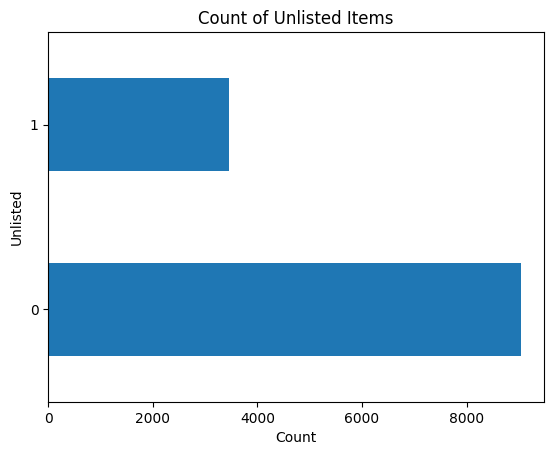

In [ ]:
ax = train_data['unlisted'].value_counts().plot(kind='barh')
ax.set_title('Count of Unlisted Items')
ax.set_xlabel('Count')
ax.set_ylabel('Unlisted')

<div class="alert alert-block alert-info">

## 3.3. Text variables check</font> <a class="anchor" id="#text_check"></a>

</div>

In [ ]:
train_data.describe(include = "object").T

,count,unique,top,freq
description,12496,11788,<b>License number</b><br />Exempt,50
host_about,12496,4396,We are Feels Like Home Holiday Rentals.\nA com...,304


In [ ]:
test_data.describe(include = "object").T

,count,unique,top,freq
description,1389,1373,<b>The space</b><br />Lisbon Nouveau apartment...,3
host_about,1389,946,We are Feels Like Home Holiday Rentals.\nA com...,32


In [ ]:
train_reviews.describe(include = "object").T

,count,unique,top,freq
comments,721402,705644,.,908


In [ ]:
test_reviews.describe(include = "object").T

,count,unique,top,freq
comments,80877,79859,.,131


In [ ]:
print('Number of "duplicated" reviews = ' + str(train_reviews.duplicated().sum() ) )

Number of "duplicated" reviews = 305


We have 305 reviews that share the same listing and comment. They are not duplicated because in the train_reviews dataframe we just have the listing id and comment, meaning that the reviews can be made by multiple people.

In [ ]:
print('Number of "duplicated" reviews = ' + str(test_reviews.duplicated().sum() ) )

Number of "duplicated" reviews = 30


We have 30 reviews that share the same listing and description.

In [ ]:
train_data['description'].value_counts()

<b>License number</b><br />Exempt                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       

In [ ]:
train_data['host_about'].value_counts()

We are Feels Like Home Holiday Rentals.\nA company that was born with a unique purpose: to bring you the best living experience during your trip to Portugal.\nThat’s right we want you to feel like home! We offer beautifully furnished, well-located apartments and houses for your holiday or business stay. We're ideal for travelers who enjoy sleeping in comfortable homes at comfortable prices!\nWe offer you options!\nChoose from over 500 carefully selected properties in Portugal, suited for every taste and every occasion. From studios to rustic country homes to sleek city duplexes, whether it´s in Algarve, Ericeira, Lisbon, Madeira, Porto, or somewhere in between, we have a property that's right for you!                                                                                                                                                  304
Dear guest.\n\nWe take pride in helping thousands of busy hosts across Europe to rent their properties professionally so you can have the st

In [ ]:
train_reviews['comments'].value_counts()

.                                                                                                                                                                                                                                                                                                                                                                       908
Great location!                                                                                                                                                                                                                                                                                                                                                         256
Great location                                                                                                                                                                                                                                                                  

In [ ]:
test_reviews['comments'].value_counts()

.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       

Both in test and train reviews dataframes, we have that a single point is the most comomn review. it doesn't tell us much about the listings. This was also confirmed by the train/test_reviews.describe() cells

<div class="alert alert-block alert-info">

## 3.4. Word Count</font> <a class="anchor" id="#wordcount"></a>

</div>

In [ ]:
train_data['word_count']  = train_data['description'].apply(lambda x: len(str(x).split(" ")))
train_data = train_data.sort_values(by='word_count', ascending=True)
train_data[['description','word_count']]

,description,word_count
index,,
5683,<b>License number</b><br />7797/AL,3
10317,<b>License number</b><br />81309/AL,3
11607,<b>License number</b><br />87804/AL,3
7564,<b>License number</b><br />48184/AL,3
12194,<b>License number</b><br />Exempt,3
...,...,...
2047,Sunny apartment 10 m from beach and train stat...,205
6453,"Apartamento completo de Dois pisos ,total de 4...",205
6600,Casa das Mónicas is a 3-storey house between ...,205


Text(0, 0.5, 'Frequency')

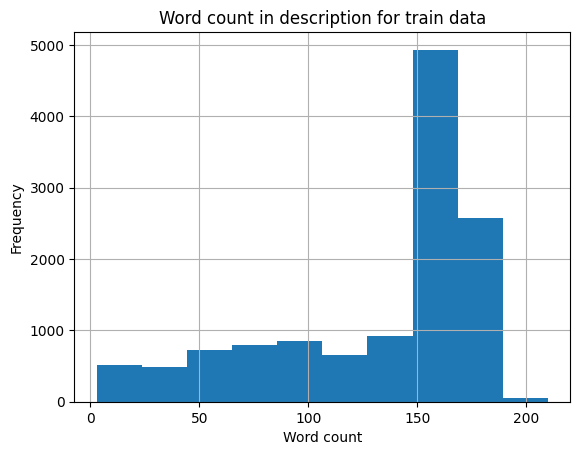

In [ ]:
ax = train_data['word_count'].hist()
ax.set_title('Word count in description for train data')
ax.set_xlabel('Word count')
ax.set_ylabel('Frequency')

In [ ]:
test_data['word_count']  = test_data['description'].apply(lambda x: len(str(x).split(" ")))
test_data = test_data.sort_values(by='word_count', ascending=True)
test_data[['description','word_count']]

,description,word_count
index,,
134,<b>License number</b><br />121745/AL,3
860,<b>License number</b><br />56788/AL,3
543,<b>License number</b><br />26330/AL,3
468,<b>License number</b><br />44062-AL,3
643,<b>License number</b><br />17490/AL,3
...,...,...
491,Be very welcome to the Bamboo Beach house! A a...,195
1177,The Family Cottage.<br /><br />Wake up to the ...,197
655,The villa in Ericeira has 4 bedrooms and has c...,204


Text(0, 0.5, 'Frequency')

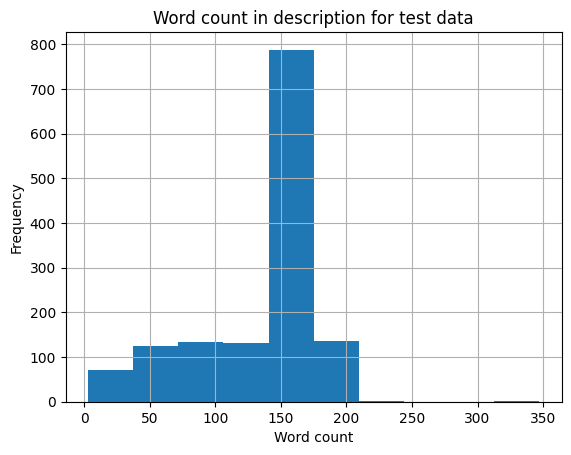

In [ ]:
ax = test_data['word_count'].hist()
ax.set_title('Word count in description for test data')
ax.set_xlabel('Word count')
ax.set_ylabel('Frequency')

In [ ]:
train_reviews['word_count']  = train_reviews['comments'].apply(lambda x: len(str(x).split(" ")))
train_reviews = train_reviews.sort_values(by='word_count', ascending=True)
train_reviews[['comments','word_count']]

# filter the dataframe to only include rows with 3 words or less
short_comments = train_reviews[train_reviews['word_count'] <= 3]

# print out the resulting dataframe
short_comments[['comments', 'word_count']].head(100)

,comments,word_count
120147,Luis的房子地點非常的好，無論是地鐵、28號公車、或是其他交通工具。房子非常舒適，所有需要...,1
250391,RAS,1
643206,太超乎預期了！<br/>兩間房間都非常乾淨舒適<br/>有客廳又有餐廳<br/>廚房設備非常...,1
247665,Good,1
62621,X,1
...,...,...
144770,;-)),1
39624,Excellent,1
362455,top,1
643387,`,1


 We found out that paragraphs written in Asian languages are considered as 1 word. This will be treated later in the translation.

Text(0, 0.5, 'Frequency')

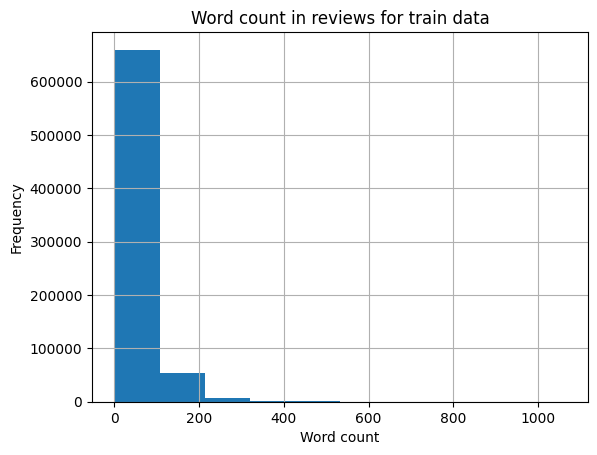

In [ ]:
ax = train_reviews['word_count'].hist()
ax.set_title('Word count in reviews for train data')
ax.set_xlabel('Word count')
ax.set_ylabel('Frequency')

In [ ]:
test_reviews['word_count']  = test_reviews['comments'].apply(lambda x: len(str(x).split(" ")))
test_reviews = test_reviews.sort_values(by='word_count', ascending=True)
test_reviews[['comments','word_count']]

,comments,word_count
5398,房东迟到30分钟。。。。,1
30799,.,1
69795,굳,1
1658,Ótimo.,1
27575,great!,1
...,...,...
41137,"This is an excellent apartment, and if I could...",850
32601,How long we stayed<br/>1 month. January 15 - F...,894
43945,"Exma Senhora,<br/><br/>Tenha vergonha na cara!...",961
66437,I had requested the host for check-in at 13.30...,965


In [ ]:
test_reviews.word_count.describe()

count    80877.000000
mean        48.029984
std         46.281235
min          1.000000
25%         18.000000
50%         36.000000
75%         64.000000
max        989.000000
Name: word_count, dtype: float64

In [ ]:
test_reviews['word_count'] = test_reviews['comments'].str.split().str.len()
test_reviews = test_reviews.sort_values(by='word_count', ascending=True)
test_reviews[['comments','word_count']]

,comments,word_count
5398,房东迟到30分钟。。。。,1
47298,房間大小對於開合行李箱較不方便，另外可能需自行更換瓦斯，對於亞洲人來說，較不容易，建議可附有...,1
38794,Ótimo,1
29822,.,1
33740,位於Alfama區，雖位於老城區但經過全新的裝潢，沒有陳舊感住起來很舒適；距離鬧區不遠步行可...,1
...,...,...
41137,"This is an excellent apartment, and if I could...",850
32601,How long we stayed<br/>1 month. January 15 - F...,875
43945,"Exma Senhora,<br/><br/>Tenha vergonha na cara!...",961
66437,I had requested the host for check-in at 13.30...,964


Text(0, 0.5, 'Frequency')

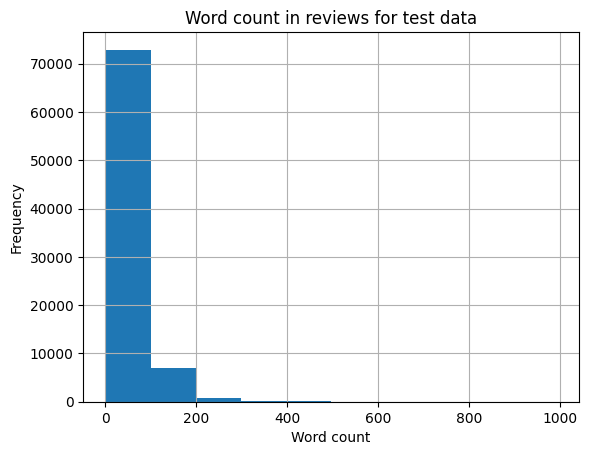

In [ ]:
ax = test_reviews['word_count'].hist()
ax.set_title('Word count in reviews for test data')
ax.set_xlabel('Word count')
ax.set_ylabel('Frequency')

<div class="alert alert-block alert-info">

## 3.5. Word Cloud</font> <a class="anchor" id="#wordcloud"></a>

</div>

In [ ]:
def produceWordCloud(df,column_name):
    text = ' '
    for review in df[column_name]:
         text += review + ' '

    cloud = WordCloud().generate(text)
    plt.imshow(cloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

<div class="alert alert-block alert-info">

## <font color='#5c666c'>3.5.1. Word clouds regarding the host about column</font> <a class="anchor" id="#wordcloud2"></a>

</div>

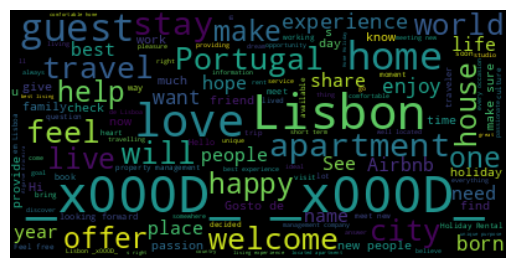

In [ ]:
produceWordCloud(train_data,column_name='host_about')

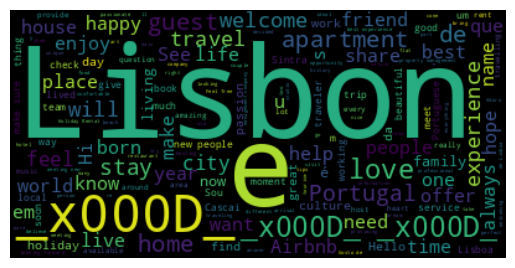

In [ ]:
produceWordCloud(test_data,column_name='host_about')

<div class="alert alert-block alert-info">

## <font color='#5c666c'>3.5.2. Word clouds regarding the description column</font> <a class="anchor" id="#wordcloud3"></a>

</div>

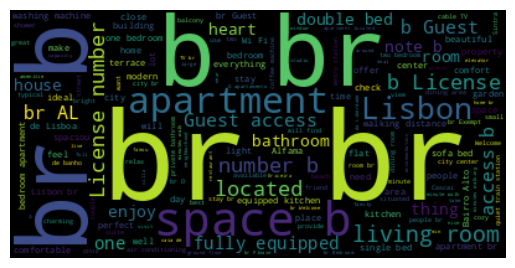

In [ ]:
produceWordCloud(train_data,column_name='description')

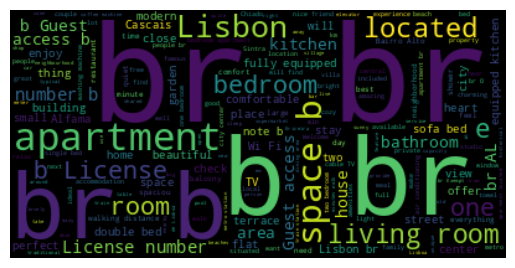

In [ ]:
produceWordCloud(test_data,column_name='description')

<div class="alert alert-block alert-info">

## <font color='#5c666c'>3.5.3. Word clouds regarding the comments column</font> <a class="anchor" id="#wordcloud4"></a>

</div>

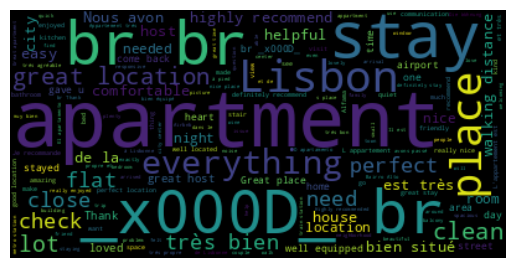

In [ ]:
train_reviews['comments'] = train_reviews['comments'].astype(str)
produceWordCloud(train_reviews,column_name='comments')

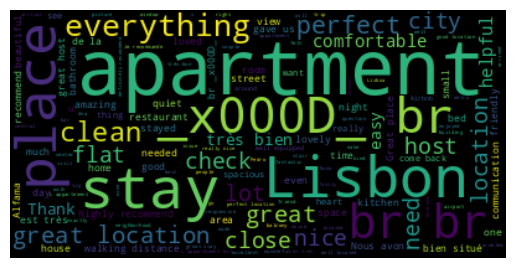

In [ ]:
produceWordCloud(test_reviews,column_name='comments')

<div class="alert alert-block alert-info">

## 3.6. Word Frequencies</font> <a class="anchor" id="#wordfrequencies"></a>

</div>

In [ ]:
all_words_des = ' '.join(train_data['description']).split()

In [ ]:
freq = pd.Series(all_words_des).value_counts()

In [ ]:
freq.sort_values(ascending=False)[0:10]

the      62717
and      54907
a        50700
/><br    34826
to       30520
of       30050
in       28007
with     27033
is       23957
de       13708
dtype: int64

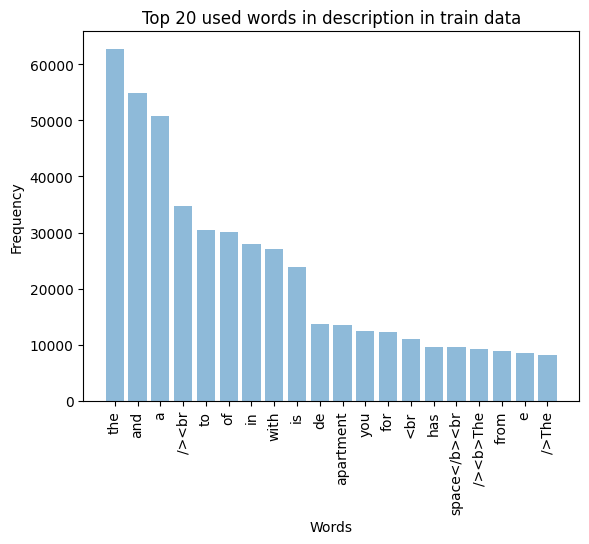

In [ ]:
x_labels = freq.index[0:20]
values = freq[:20]
plt.bar(x_labels, values, align='center', alpha=0.5)
plt.xticks(x_labels)
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 20 used words in description in train data')
plt.xticks(rotation=90)
plt.show()

<div class="alert alert-block alert-info">

## 3.7. Top Emojis used</font> <a class="anchor" id="#wordfrequencies"></a>

</div>

In [ ]:
pattern = re.compile("["
        u"\U0001F600-\U0001F64F"
        u"\U0001F300-\U0001F5FF"
        u"\U0001F680-\U0001F6FF"
        u"\U0001F1E0-\U0001F1FF"
                        "]+", flags=re.UNICODE)

In [ ]:
#emoji_present = train_data['description'].str.contains(pattern.pattern).any() #emojis present
#emoji_present = train_data['host_about'].str.contains(pattern.pattern).any() #emojis NOT present
#emoji_present = train_reviews['comments'].str.contains(pattern.pattern).any() #emojis present
#emoji_present = test_data['description'].str.contains(pattern.pattern).any() #emojis present
#emoji_present = test_data['host_about'].str.contains(pattern.pattern).any() #emojis NOT present
emoji_present = test_reviews['comments'].str.contains(pattern.pattern).any() #emojis present

if emoji_present:
    print("Emojis found in this text column.")
else:
    print("No emojis found in this text column.")

Emojis found in this text column.


Now that we know that there are emojis in the 'comments' and 'description' from the train/test_reviews and train/test_data repectavely. We can check the top 10 emojis used in this section.

In [ ]:
def top10_emojis(df,column_name):
    df['emojis'] = df[column_name].apply(lambda x: pattern.findall(x))

    all_emojis = [emoji for row in df['emojis'] for emoji in row]
    emoji_counts = pd.Series(all_emojis).value_counts()
    emoji_counts = emoji_counts.sort_values(ascending=False)

    return emoji_counts.head(10)

In [ ]:
top10_emojis_train_reviews =top10_emojis(train_reviews,'comments')
top10_emojis_train_reviews

😊     2312
👍     1009
😉      681
🙂      509
👌      452
😁      415
😀      337
😍      330
👍🏻     274
👍🏼     232
dtype: int64

In our train_reviews dataframe, we can see that the top emojis used in the comments are to convey a positive emotion. In our dataset we can see that emojis are mostly correlated with positive reviews.

In [ ]:
top10_emojis(test_reviews,'comments')

😊     283
👍     105
😉      84
🙂      64
👌      56
😁      50
😍      39
😀      38
👍🏻     22
👍🏼     21
dtype: int64

In our test_reviews dataframe, we have the exact same order of top emojis.

In [ ]:
top10_emojis(train_data,'description')

📍    5
😊    3
🌉    2
🌴    2
📡    2
😉    1
💯    1
🏖    1
🙂    1
🙌    1
dtype: int64

In the train_data dataframe, we less emojis than compared to our reviews datasets. The use of emojis is more informational,  to point towards a location in that listing.

In [ ]:
top10_emojis(test_data,'description')

😊     1
🎉😘    1
🏽     1
💙🌷    1
🌿     1
😄     1
dtype: int64

In the test_data dataframe, we have a small presence of emojis but it's mostly to convey a positive message.

<div class="alert alert-block alert-info">

## 3.8. Reviews per listing distribution</font> <a class="anchor" id="#reviews"></a>

</div>

In [ ]:
reviews_train_count = train_reviews.groupby('index').size()
reviews_train_count

index
1         50
5         41
8        168
9         33
10        13
        ... 
12490     32
12491     11
12492    312
12493     35
12494    209
Length: 8467, dtype: int64

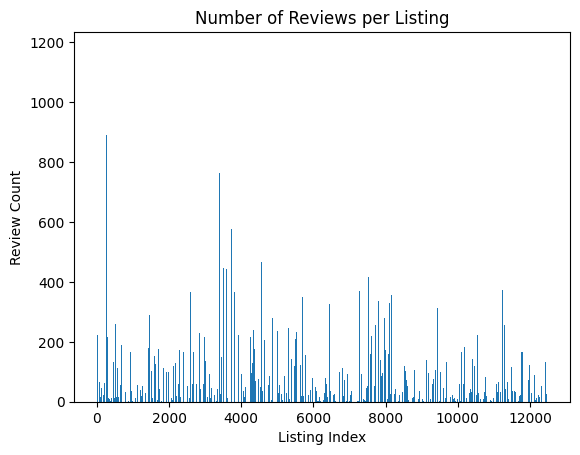

In [ ]:
plt.bar(reviews_train_count.index, reviews_train_count.values)
plt.xlabel('Listing Index')
plt.ylabel('Review Count')
plt.title('Number of Reviews per Listing')
plt.show()

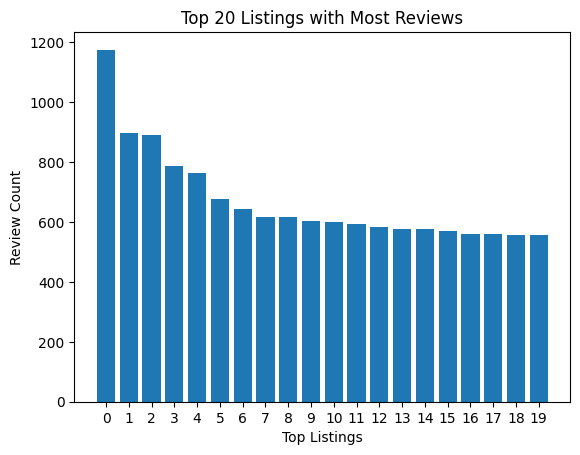

In [ ]:
top_20_listings = reviews_train_count.nlargest(20)
x_indices = range(len(top_20_listings))

plt.bar(x_indices, top_20_listings.values)
plt.xlabel('Top Listings')
plt.ylabel('Review Count')
plt.title('Top 20 Listings with Most Reviews')
plt.xticks(x_indices)
plt.show()

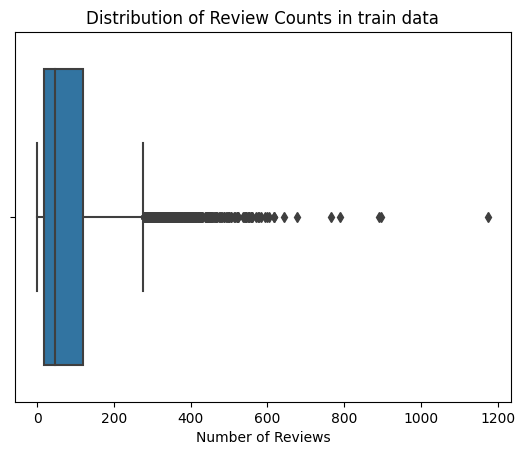

In [ ]:
sns.boxplot(x=reviews_train_count)
plt.xlabel('Number of Reviews')
plt.title('Distribution of Review Counts in train data')
plt.show()

In [ ]:
reviews_test_count = test_reviews.groupby('index').size()
reviews_test_count

index
1       125
2        11
4        17
5        50
6        15
       ... 
1383     31
1384     85
1386    337
1387     48
1388      2
Length: 950, dtype: int64

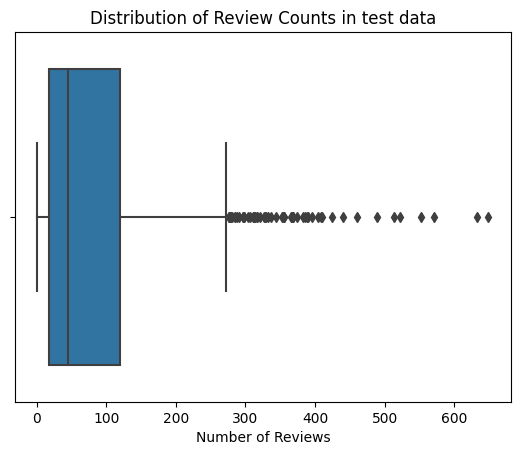

In [ ]:
sns.boxplot(x=reviews_test_count)
plt.xlabel('Number of Reviews')
plt.title('Distribution of Review Counts in test data')
plt.show()

<div class="alert alert-block alert-info">

## 3.9. Language Check</font> <a class="anchor" id="#language"></a>

</div>

In [ ]:
languages_test_df= test_reviews.copy()

# Drop rows with missing comments
languages_test_df.dropna(subset=['comments'], inplace=True)

languages_test_df['comments'] = languages_test_df['comments'].apply(lambda x: re.sub(r'[^\w\s]', '', x.lower()) if isinstance(x, str) else '')

# Detect the language of each review
languages_test_df['language'] = languages_test_df['comments'].apply(lambda x: detect(x) if len(x) > 5 else 'Unknown')

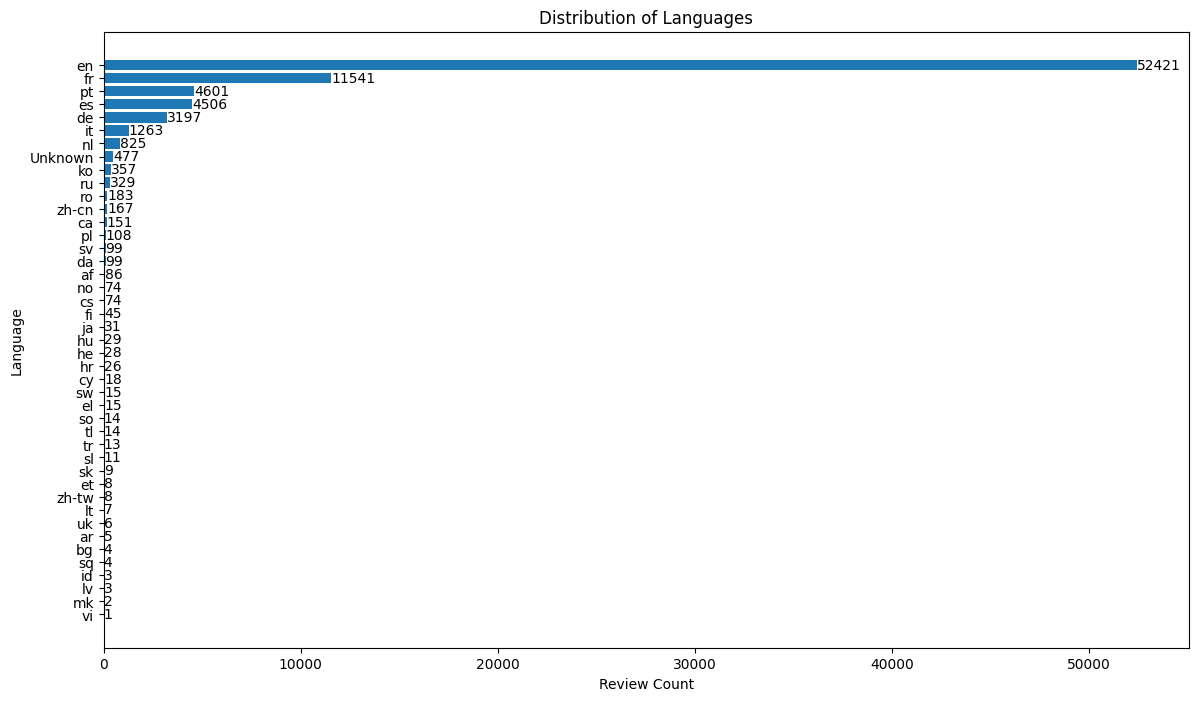

In [ ]:
# Count the number of reviews for each language
language_counts = languages_test_df['language'].value_counts()

language_counts = language_counts.sort_values(ascending=False)

# Set the figure size
plt.figure(figsize=(14, 8))

plt.barh(language_counts.index[::-1], language_counts.values[::-1])
plt.ylabel('Language')
plt.xlabel('Review Count')
plt.title('Distribution of Languages in Reviews')

# Add text annotations for each bar
for i, count in enumerate(language_counts.values[::-1]):
    plt.text(count, i, str(count), va='center')

plt.show()

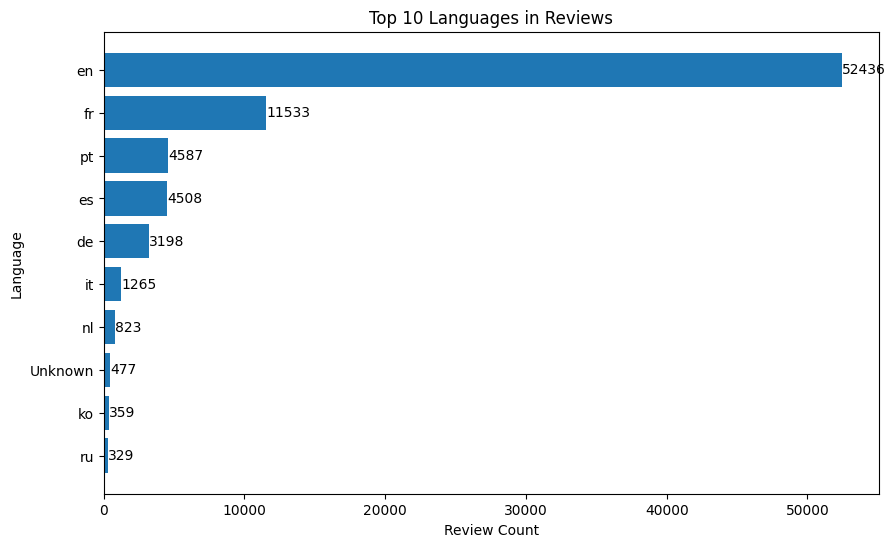

In [ ]:
# Get the top 10 languages
language_counts = languages_test_df['language'].value_counts()
language_counts = language_counts.sort_values(ascending=False)
top_10_languages = language_counts[:10]

# Set the figure size
plt.figure(figsize=(10, 6))

plt.barh(top_10_languages.index[::-1], top_10_languages.values[::-1])
plt.ylabel('Language')
plt.xlabel('Review Count')
plt.title('Top 10 Languages in Reviews')

# Add text annotations for each bar
for i, count in enumerate(top_10_languages.values[::-1]):
    plt.text(count, i, str(count), va='center')

plt.show()

<div class="alert alert-block alert-info">

# <font color='#bfd532'>4. Data Preprocessing</font> <a class="anchor" id="preprocessing"></a>

</div>

<div class="alert alert-block alert-info">

## 4.1. Data Cleaning <a class="anchor" id="cleaning"></a>

</div>

In [ ]:
def preprocess_text(text, transform_emoji=True):

    # Preprocessing steps
    stop_words = set(stopwords.words('english'))
    lemmatizer = WordNetLemmatizer()

    # Removing HTML tags
    soup = BeautifulSoup(text, "lxml")
    text = soup.get_text(separator=" ")

    # Convert input to string, in case it's not
    text = str(text)

    # Define the emoticons you want to preserve
    emoticons = {
        ":)": "happy",
        ":D": "big_grin",
        ":P": "sticking_out_tongue",
        ";)": "wink",
        ":(": "sad_frown",
        ":O": "surprise",
        "<3": "heart",
        ":')": "tears_of_joy",
        ":*": "kiss",
        ":|": "neutral",
        "XD": "happy",
        "_x000d_": "happy",
        "_X000d_": "happy",
        "_x000D_":  "happy"
    }

    # Replace emoticons in text
    for emot, word in emoticons.items():
        text = text.replace(emot, word)

    if transform_emoji:
        # emojis
        text = emoji.demojize(text)

    # Removing special characters
    text = re.sub(r'\W', ' ', text)

    # Removing single characters
    text = re.sub(r'\s+[a-zA-Z]\s+', ' ', text)

    # Removing multiple spaces
    text = re.sub(r'\s+', ' ', text, flags=re.I)

    # Converting to lowercase
    text = text.lower()

    # Lemmatization
    text = text.split()
    text = [lemmatizer.lemmatize(word) for word in text if not word in stop_words]
    text = ' '.join(text)

    return text

<div class="alert alert-block alert-info">

## 4.2. Translation <a class="anchor" id="translation"></a>

</div>

In [ ]:
import os

def translate_comment(comment, translator, target_lang='en'):
    try:
        lang = detect(comment)
        if lang != target_lang:
            translation = translator.translate(comment, src=lang, dest=target_lang).text
            return translation
    except:
        pass
    return comment

def preprocess_translated_data(data, data_name, save_directory, indexes=None, comments_columns=['comments'], target_lang='en'):
    # Initialize translator
    translator = Translator()

    # Create a directory to store preprocessed data
    directory = save_directory
    os.makedirs(directory, exist_ok=True)

    # Default to running on all indexes
    if indexes is None:
        indexes = data.index.unique()

    # Iterate over indexes
    for index in indexes:
        # Filter data for the current index
        group = data[data.index == index].copy()

        for comments_column in comments_columns:
            # Translate and preprocess comments
            group[f'translated_{comments_column}'] = group[comments_column].apply(lambda x: translate_comment(x, translator, target_lang))
            group[f'translated_prep_{comments_column}'] = group[f'translated_{comments_column}'].apply(lambda x: preprocess_text(x))

        # Write processed group to a Parquet file
        filename = f'{directory}/preprocessed_{data_name}_{index}.parquet'
        group.to_parquet(filename, index=True)

        print(f"Processed index: {index} and saved to {filename}")

    return None

<div class="alert alert-block alert-info">

## 4.3. Pre-Processing Training data <a class="anchor" id="#preposstrain"></a>

</div>

In [ ]:
#Train Reviews
# Get list of all files in directory
indexes = list(train_reviews.index.unique())

list1 = indexes[::3]     # Every 3rd item starting from position 0
list2 = indexes[1::3]    # Every 3rd item starting from position 1
list3 = indexes[2::3]    # Every 3rd item starting from position 2

# Verify lengths
#print(len(list1), len(list2), len(list3))  # Outputs: 2823 2822 2822

import os

directory_translated = '/content/drive/MyDrive/Master/2nd Semester/TM/Group Project TM/Translated Data/train_reviews'

files = os.listdir(directory_translated)

# Extract the index numbers from the filenames
index_numbers = [int(re.search('preprocessed_data_(\d+).parquet', file).group(1)) for file in files if file.endswith('.parquet')]

diff_list = [num for num in indexes if num not in index_numbers]

len(diff_list)

In [ ]:
preprocess_translated_data(data=train_reviews,data_name='data',save_directory= directory_translated,
                                                        indexes=diff_list,
                                                        comments_column='comments', target_lang='en')

In [ ]:
#preprocessed_train_reviews = pd.concat([pd.read_parquet(os.path.join(directory_translated, f)) for f in os.listdir(directory_translated) if f.endswith('.parquet')])

In [ ]:
#Train Data
directory_translated = '/content/drive/MyDrive/Group Project TM/Translated Data/train_data'

preprocess_translated_data(data=train_data,data_name='train_data',save_directory=directory_translated,
                           #indexes=[5,10],
                           comments_columns=['description','host_about'],
                           target_lang='en')

In [ ]:
#preprocessed_train_data = pd.concat([pd.read_parquet(os.path.join(directory_translated, f)) for f in os.listdir(directory_translated) if f.endswith('.parquet')])

<div class="alert alert-block alert-info">

## 4.4. Pre-Processing Test data <a class="anchor" id="#preposstest"></a>

</div>

In [ ]:
### Test Reviews
# Get list of all files in directory

indexes = list(test_reviews.index.unique())

list1 = indexes[::3]     # Every 3rd item starting from position 0
list2 = indexes[1::3]    # Every 3rd item starting from position 1
list3 = indexes[2::3]    # Every 3rd item starting from position 2

# Verify lengths
#print(len(list1), len(list2), len(list3))  # Outputs: 2823 2822 2822

import os

directory_translated = '/content/drive/MyDrive/Group Project TM/Translated Data/test_reviews'


files = os.listdir(directory_translated)

# Extract the index numbers from the filenames
index_numbers = [int(re.search('preprocessed_data_(\d+).parquet', file).group(1)) for file in files if file.endswith('.parquet')]

diff_list = [num for num in indexes if num not in index_numbers]

len(diff_list)

In [ ]:
preprocess_translated_data(data=test_reviews,data_name='data',save_directory= directory_translated,
                                                        indexes=diff_list,
                                                        comments_column='comments', target_lang='en')

In [ ]:
#preprocessed_test_reviews = pd.concat([pd.read_parquet(os.path.join(directory_translated, f)) for f in os.listdir(directory_translated) if f.endswith('.parquet')])

In [ ]:
#Test Data
directory_translated = '/content/drive/MyDrive/Group Project TM/Translated Data/test_data'

preprocess_translated_data(data=test_data,
                           data_name='test_data',
                           save_directory=directory_translated,
                           #indexes=[5,10],
                           comments_columns=['description','host_about'],
                           target_lang='en')

In [ ]:
#preprocessed_test_data = pd.concat([pd.read_parquet(os.path.join(directory_translated, f)) for f in os.listdir(directory_translated) if f.endswith('.parquet')])

<div class="alert alert-block alert-info">

## 4.5. Sentiment analysis <a class="anchor" id="sentimentanalysis"></a>

</div>

In [ ]:
# Load the pre-trained model and tokenizer
model_name = "bert-base-multilingual-cased"
tokenizer = BertTokenizer.from_pretrained(model_name)
model = TFBertForSequenceClassification.from_pretrained(model_name)

def bert(dataset):

  # Get the texts from the "updated_description" column
  texts = dataset["updated_description"]

  # List to store predicted sentiments
  sentiments = []

  # Tokenize and analyze each text
  for text in texts:
      # Tokenize the input text
      tokens = tokenizer.encode_plus(text, max_length=128, truncation=True, padding='max_length', return_tensors='tf')

      # Perform sentiment analysis
      outputs = model(tokens['input_ids'], attention_mask=tokens['attention_mask'])
      predicted_sentiment = "positive" if outputs.logits[0][0] > 0 else "negative"

      sentiments.append(predicted_sentiment)

In [ ]:
train_data["sentiment"] = bert(train_data)

In [ ]:
train_data

In [ ]:
from transformers import BertTokenizer, TFBertForSequenceClassification

# Load the pre-trained model and tokenizer
model_name = "bert-base-multilingual-cased"
tokenizer = BertTokenizer.from_pretrained(model_name)
model = TFBertForSequenceClassification.from_pretrained(model_name)

bert = pd.DataFrame(columns=["index", "text", "sentiment"])

#for comment in range(len(train_reviews["comments"])):
for comment in range(5):
  text = train_reviews["comments"][comment]
  # Tokenize the input text
  tokens = tokenizer.encode_plus(text, max_length=128, truncation=True, padding='max_length', return_tensors='tf')

  # Perform sentiment analysis
  outputs = model(tokens['input_ids'], attention_mask=tokens['attention_mask'])
  predicted_sentiment = "positive" if outputs.logits[0][0] > 0 else "negative"

  print(f"Predicted sentiment: {predicted_sentiment}")
  bert.loc[len(bert)] = [comment,text,predicted_sentiment]

In [ ]:
bert

In [ ]:
from transformers import pipeline
import torch

classifier = pipeline("sentiment-analysis")
classifier(["I've been waiting for a HuggingFace course my whole life.",
            "I hate this so much!"])

In [ ]:
comments = train_reviews["comments"].tolist()

classifier = pipeline("sentiment-analysis")
classifier(comments)

In [ ]:
comments = [train_reviews["comments"]]
comments.head(2)

In [ ]:
train_reviews["comments"].tolist()

<div class="alert alert-block alert-info">

# <font color='#bfd532'>5. Feature Engineering</font> <a class="anchor" id="featureengineering"></a>

</div>

In [5]:
pre_processed_files_path = '/content/drive/MyDrive/Preprocessed Data/'

In [6]:
test_data_pre = pd.read_csv(pre_processed_files_path+'translated_test_data.csv')
test_reviews_pre = pd.read_csv(pre_processed_files_path+'translated_test_data.csv')
train_data_pre = pd.read_csv(pre_processed_files_path+'translated_test_data.csv')
train_data_pre = pd.read_csv(pre_processed_files_path+'translated_test_data.csv')

In [ ]:
train_data_pre.head(2)

,index,description,host_about,translated_description,translated_prep_description,translated_host_about,translated_prep_host_about
0,1,<b>The space</b><br />Apartment located in the...,"Gosto de viajar, de conhecer pessoas, gosto de...",<b>The space</b><br />Apartment located in the...,space apartment located historic center lisbon...,"I like to travel, to meet people, I like to we...",like travel meet people like welcome friend ho...
1,2,"IMPORTANT: In response to COVID-19, this prope...",We are the be@home Team!\n\nYou can count on u...,"IMPORTANT: In response to COVID-19, this prope...",important response covid 19 property extended ...,We are the be@home Team!\n\nYou can count on u...,home team count u take care every single detai...


In [ ]:
test_data_pre.head(2)

,index,description,host_about,translated_description,translated_prep_description,translated_host_about,translated_prep_host_about
0,1,<b>The space</b><br />Apartment located in the...,"Gosto de viajar, de conhecer pessoas, gosto de...",<b>The space</b><br />Apartment located in the...,space apartment located historic center lisbon...,"I like to travel, to meet people, I like to we...",like travel meet people like welcome friend ho...
1,2,"IMPORTANT: In response to COVID-19, this prope...",We are the be@home Team!\n\nYou can count on u...,"IMPORTANT: In response to COVID-19, this prope...",important response covid 19 property extended ...,We are the be@home Team!\n\nYou can count on u...,home team count u take care every single detai...


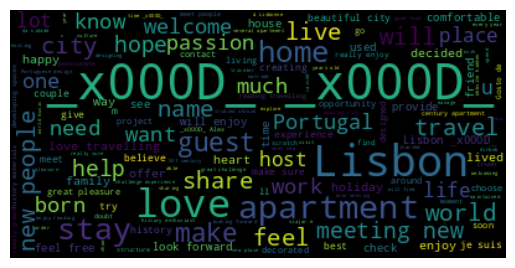

In [ ]:
produceWordCloud(test_data_pre,column_name='translated_prep_host_about')

In [ ]:
produceWordCloud(train_data_pre,column_name='description')

In [ ]:
produceWordCloud(test_data_pre,column_name='description')

In [ ]:
produceWordCloud(train_data_pre,column_name='sentiment')

<div class="alert alert-block alert-info">

## 5.1. Definition of Features <a class="anchor" id="defeature"></a>

</div>

In [7]:
train_translated = pd.read_csv('/content/drive/MyDrive/Preprocessed Data/merge_train_data.csv')

In [8]:
test_translated  = pd.read_csv('/content/drive/MyDrive/Preprocessed Data/merge_test_data.csv')

In [9]:
train_embed_tf = train_translated[['index','unlisted','translated_prep_host_about','translated_prep_description','Negative','Neutral','Positive','total_reviews','negative_rate %']]
train_embed_tf['combined_text'] = train_embed_tf['translated_prep_host_about'] + ' ' + train_embed_tf['translated_prep_description']
train_embed_tf.head(2)

,index,unlisted,translated_prep_host_about,translated_prep_description,Negative,Neutral,Positive,total_reviews,negative_rate %,combined_text
0,1,0,local accommodation registration 20835 al,shared mixed room hostel shared bathroom locat...,1.0,2.0,47.0,50.0,2.0,local accommodation registration 20835 al shar...
1,2,1,friendly host try always around need anything ...,space close parque eduardo vii saldanha estefa...,0.0,0.0,0.0,0.0,0.0,friendly host try always around need anything ...


In [10]:
test_embed_tf = test_translated[['index','translated_prep_host_about','translated_prep_description','Negative','Neutral','Positive','total_reviews','negative_rate %']]
test_embed_tf['combined_text'] = test_embed_tf['translated_prep_host_about'] + ' ' + test_embed_tf['translated_prep_description']
test_embed_tf.head(2)

,index,translated_prep_host_about,translated_prep_description,Negative,Neutral,Positive,total_reviews,negative_rate %,combined_text
0,1,like travel meet people like welcome friend ho...,space apartment located historic center lisbon...,0.0,2.0,123.0,125.0,0.0,like travel meet people like welcome friend ho...
1,2,home team count u take care every single detai...,important response covid 19 property extended ...,0.0,0.0,11.0,11.0,0.0,home team count u take care every single detai...


In [11]:
test_index =  test_translated['index']

In [ ]:
test_index.head(2)

0    1
1    2
Name: index, dtype: int64

In [12]:
train_embed_tf.dropna(inplace=True)

In [13]:
train_embed_tf['combined_text'] = train_embed_tf['combined_text'].astype(str)

In [14]:
test_embed_tf['combined_text'] = test_embed_tf['combined_text'].astype(str)

<div class="alert alert-block alert-info">

## 5.2. TF-IDF <a class="anchor" id="tfidf"></a>

</div>

In [ ]:
# Define TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer()

# Fit and transform TF-IDF vectorizer on preprocessed train data
tfidf_features = tfidf_vectorizer.fit_transform(train_embed_tf['combined_text'])

# Convert the train_reviews data to tensors
train_inputs = torch.tensor(tfidf_features.toarray(), dtype=torch.float32)
train_labels = torch.tensor(train_embed_tf['unlisted'], dtype=torch.float32)

<div class="alert alert-block alert-info">

## 5.3. GloVe embeddings <a class="anchor" id="glove"></a>

</div>

In [15]:
model_glove = api.load("glove-wiki-gigaword-50")

[==================================================] 100.0% 66.0/66.0MB downloaded


In [16]:
def get_word_embeddings_glove(text):
  all_word_embeddings = []
  for word in text.split():
    try:
      word_embedding = model_glove.word_vec(word)
    except KeyError:
      word_embedding = [0.0] * model_glove.vector_size


    all_word_embeddings.append(word_embedding)


  all_word_embeddings = np.array(all_word_embeddings)
  reshaped = all_word_embeddings.reshape(1, -1)


  return reshaped


In [17]:
train_embed_tf['combined_text'] = train_embed_tf['combined_text'].apply(get_word_embeddings_glove)

In [ ]:
train_embed_tf['combined_text'].head(2)

0    [[-0.050693999975919724, -0.08485399931669235,...
1    [[0.23281000554561615, 0.4938200116157532, -0....
Name: combined_text, dtype: object

In [18]:
test_embed_tf['combined_text'] = test_embed_tf['combined_text'].apply(get_word_embeddings_glove)

<div class="alert alert-block alert-info">

## 5.4. Doc2vec Embedding <a class="anchor" id="glove"></a>

</div>

In [ ]:
path_pre = '/content/drive/MyDrive/Project_Corpora/'

In [ ]:
pre_train_reviews = pd.read_csv(path_pre + 'train_reviews_lem.csv')
pre_test_reviews = pd.read_csv(path_pre + 'test_reviews_lem.csv')
pre_train_data = pd.read_csv(path_pre + 'train_data_lem.csv',index_col=0)
pre_test_data = pd.read_csv(path_pre + 'test_data_lem.csv', index_col=0)

(580344, 145087, 580344, 145087)

Doc2vec embedding for test data

In [ ]:
tagged_data = []
for index, row in pre_test_data.iterrows():
    description = str(row['description_lem'])
    host_about = str(row['host_about_lem'])

    if description.strip():
        tagged_data.append(TaggedDocument(words=description.split(), tags=[f'description_{index}']))

    if host_about.strip():
        tagged_data.append(TaggedDocument(words=host_about.split(), tags=[f'host_about_{index}']))

# Initialize and train the Doc2Vec model
model = Doc2Vec(vector_size=100, min_count=5, epochs=10)
model.build_vocab(tagged_data)
model.train(tagged_data, total_examples=model.corpus_count, epochs=model.epochs)

# Create new columns for the embeddings
pre_test_data['description_embedding'] = None
pre_test_data['host_about_embedding'] = None

# Get the document embeddings for the 'description' and 'host_about' columns
for tagged_doc in tagged_data:
    for element in tagged_doc.tags:
        if 'description' in element:
            description_embedding = model.infer_vector(tagged_doc.words)
            index = int(element.split('_')[1])  # Extract the index from the tag
            pre_test_data.at[index, 'description_embedding'] = description_embedding
        if 'host_about' in element:
            host_about_embedding = model.infer_vector(tagged_doc.words)
            index = int(element.split('_')[2])  # Extract the index from the tag
            pre_test_data.at[index, 'host_about_embedding'] = host_about_embedding

Doc2vec embedding for train data

In [ ]:
tagged_data = []
for index, row in pre_train_data.iterrows():
    description = str(row['description_lem'])
    host_about = str(row['host_about_lem'])

    if description.strip():
        tagged_data.append(TaggedDocument(words=description.split(), tags=[f'description_{index}']))

    if host_about.strip():
        tagged_data.append(TaggedDocument(words=host_about.split(), tags=[f'host_about_{index}']))

# Initialize and train the Doc2Vec model
model = Doc2Vec(vector_size=100, min_count=5, epochs=10)
model.build_vocab(tagged_data)
model.train(tagged_data, total_examples=model.corpus_count, epochs=model.epochs)

# Create new columns for the embeddings
pre_train_data['description_embedding'] = None
pre_train_data['host_about_embedding'] = None

# Get the document embeddings for the 'description' and 'host_about' columns
for tagged_doc in tagged_data:
    for element in tagged_doc.tags:
        if 'description' in element:
            description_embedding = model.infer_vector(tagged_doc.words)
            index = int(element.split('_')[1])  # Extract the index from the tag
            pre_train_data.at[index, 'description_embedding'] = description_embedding
        if 'host_about' in element:
            host_about_embedding = model.infer_vector(tagged_doc.words)
            index = int(element.split('_')[2])  # Extract the index from the tag
            pre_train_data.at[index, 'host_about_embedding'] = host_about_embedding

In [ ]:
# Merge the 'unlisted' column from train_data to pre_train_data based on the 'index' column
pre_train_data = pre_train_data.merge(train_data[['unlisted']], left_on='index', right_on='index')

Doc2vec embedding for test reviews

In [ ]:
tagged_data = []
for index, row in pre_test_reviews.iterrows():
    comments = str(row['comments_lem'])

    if comments.strip():
        tagged_data.append(TaggedDocument(words=comments.split(), tags=[f'comments_{index}']))

# Initialize and train the Doc2Vec model
model = Doc2Vec(vector_size=100, min_count=5, epochs=10)
model.build_vocab(tagged_data)
model.train(tagged_data, total_examples=model.corpus_count, epochs=model.epochs)

# Create new columns for the embeddings
pre_test_reviews['comments_embedding'] = None

# Get the document embeddings for the 'comments' column
for tagged_doc in tagged_data:
  for element in tagged_doc.tags:
      if 'comments' in element:
        comments_embedding = model.infer_vector(tagged_doc.words)
        index = int(element.split('_')[1])  # Extract the index from the tag
        pre_test_reviews.at[index, 'comments_embedding'] = comments_embedding


Doc2vec embedding for train reviews

In [ ]:
tagged_data = []
for index, row in pre_train_reviews.iterrows():
    comments = str(row['comments_lem'])

    if comments.strip():
        tagged_data.append(TaggedDocument(words=comments.split(), tags=[f'comments_{index}']))

# Initialize and train the Doc2Vec model
model = Doc2Vec(vector_size=100, min_count=5, epochs=10)
model.build_vocab(tagged_data)
model.train(tagged_data, total_examples=model.corpus_count, epochs=model.epochs)

# Create new columns for the embeddings
pre_train_reviews['comments_embedding'] = None

# Get the document embeddings for the 'comments' column
for tagged_doc in tagged_data:
  for element in tagged_doc.tags:
     if 'comments' in element:
        comments_embedding = model.infer_vector(tagged_doc.words)
        index = int(element.split('_')[1])  # Extract the index from the tag
        pre_train_reviews.at[index, 'comments_embedding'] = comments_embedding

Doc2vec data was saved and can be uploaded using the following cell

In [ ]:
d2v_train_data = pd.read_excel(path_pre + 'pre_train_reviews.xlsx')
d2v_test_data = pd.read_excel(path_pre + 'pre_test_reviews.xlsx')

<div class="alert alert-block alert-info">

## 5.5. Bert Embedding <a class="anchor" id="glove"></a>

</div>

In [ ]:
model_bert = SentenceTransformer('distilbert-base-multilingual-cased')

In [ ]:
def get_word_embeddings_bert(text):
  all_word_embeddings = []

  for word in text.split():
    word_embedding = model_bert.encode([word])
    all_word_embeddings.append(word_embedding)

  return all_word_embeddings

In [ ]:
train_embed_tf['combined_text'] = train_embed_tf['combined_text'].apply(get_word_embeddings_bert)

In [ ]:
test['combined_text'] = test['combined_text'].apply(get_word_embeddings_bert)

<div class="alert alert-block alert-info">

# <font color='#bfd532'>6. Classification Models</font> <a class="anchor" id="classificationmodels"></a>

</div>

In [19]:
train_embed_tf.head(2)

,index,unlisted,translated_prep_host_about,translated_prep_description,Negative,Neutral,Positive,total_reviews,negative_rate %,combined_text
0,1,0,local accommodation registration 20835 al,shared mixed room hostel shared bathroom locat...,1.0,2.0,47.0,50.0,2.0,"[[-0.050693999975919724, -0.08485399931669235,..."
1,2,1,friendly host try always around need anything ...,space close parque eduardo vii saldanha estefa...,0.0,0.0,0.0,0.0,0.0,"[[0.23281000554561615, 0.4938200116157532, -0...."


In [20]:
X = train_embed_tf[['index','combined_text','Negative','Neutral','Positive','total_reviews','negative_rate %']]
X.set_index('index', inplace=True)
y = train_embed_tf[['index','unlisted']]
y.set_index('index', inplace=True)

In [21]:
X['combined_text'] = X['combined_text'].astype(str)
test_embed_tf['combined_text'] = test_embed_tf['combined_text'].astype(str)

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3,shuffle=True)

In [23]:
vectorizer = DictVectorizer()
X_train = vectorizer.fit_transform(X_train.to_dict(orient='records'))


X_test = vectorizer.transform(X_test.to_dict(orient='records'))
test_embed_tf['combined_text'] = test_embed_tf['combined_text'].apply(lambda x: ' '.join(x))


test_dicts = test_embed_tf.to_dict(orient='records')


test_embed_tf = vectorizer.transform(test_dicts)


In [24]:
def train_val_metrics(model,X_test,y_train,pred_train,y_test,pred_val):
  print('___________________________________________________________________________________________________________')
  print('                                                   TRAIN                                                   ')
  print('-----------------------------------------------------------------------------------------------------------')
  print('Accuracy:' ,accuracy_score(y_train, pred_train))
  print('Precision:' , precision_score(y_train, pred_train))
  print('Recall:' , recall_score(y_train, pred_train))
  print('F1 Score:' ,f1_score(y_train, pred_train))
  print('___________________________________________________________________________________________________________')
  print('                                                 VALIDATION                                                 ')
  print('-----------------------------------------------------------------------------------------------------------')
  print('Accuracy:' ,accuracy_score(y_test, pred_val))
  print('Precision:' , precision_score(y_test, pred_val))
  print('Recall:' , recall_score(y_test, pred_val))
  print('F1 Score:' ,f1_score(y_test, pred_val))
  print('___________________________________________________________________________________________________________')


<div class="alert alert-block alert-info">

## 6.1. Logistic Regression <a class="anchor" id="LR"></a>

</div>

In [34]:
# Calculate class weights
class_weights = {}
n_samples = len(y_train)
n_classes = np.unique(y_train).shape[0]

vc= list(y_train.value_counts())
count = np.array(vc)
weights = n_samples / (n_classes * count)
print(weights)

[0.69033149 1.81349782]


In [36]:
# Map class integers to class weights
for cls, wt in zip(np.unique(y_train), weights):
  class_weights[cls] = wt

print(class_weights)

{0: 0.6903314917127071, 1: 1.8134978229317853}


In [37]:
lrm = LogisticRegression(class_weight= class_weights)
lrm.fit(X_train, y_train)


pred_train = lrm.predict(X_train)
pred_val = lrm.predict(X_test)

In [38]:
train_val_metrics(lrm,X_test,y_train,pred_train,y_test,pred_val)

___________________________________________________________________________________________________________
                                                   TRAIN                                                   
-----------------------------------------------------------------------------------------------------------
Accuracy: 0.7910164065626251
Precision: 0.5781579564096555
Recall: 0.8951378809869376
F1 Score: 0.7025487683326213
___________________________________________________________________________________________________________
                                                 VALIDATION                                                 
-----------------------------------------------------------------------------------------------------------
Accuracy: 0.7496
Precision: 0.5349439171699741
Recall: 0.8769448373408769
F1 Score: 0.6645230439442659
___________________________________________________________________________________________________________


In [39]:
print(classification_report(y_test, pred_val))

              precision    recall  f1-score   support

           0       0.94      0.70      0.80      1793
           1       0.53      0.88      0.66       707

    accuracy                           0.75      2500
   macro avg       0.74      0.79      0.73      2500
weighted avg       0.82      0.75      0.76      2500



<div class="alert alert-block alert-info">

## 6.2. KNN Classifier <a class="anchor" id="LR"></a>

</div>

In [60]:
clf = KNeighborsClassifier(n_neighbors = 10, metric = 'euclidean', weights='distance')
clf.fit(X_train, y_train)

pred_train = clf.predict(X_train)
pred_val = clf.predict(X_test)
pred_test = clf.predict(test_embed_tf)

In [57]:
train_val_metrics(clf,X_test,y_train,pred_train,y_test,pred_val)

___________________________________________________________________________________________________________
                                                   TRAIN                                                   
-----------------------------------------------------------------------------------------------------------
Accuracy: 0.9727891156462585
Precision: 0.9477289113193944
Recall: 0.9539187227866474
F1 Score: 0.9508137432188065
___________________________________________________________________________________________________________
                                                 VALIDATION                                                 
-----------------------------------------------------------------------------------------------------------
Accuracy: 0.8688
Precision: 0.753004005340454
Recall: 0.7977369165487977
F1 Score: 0.7747252747252746
___________________________________________________________________________________________________________


In [42]:
print(classification_report(y_test, pred_val))

              precision    recall  f1-score   support

           0       0.92      0.90      0.91      1793
           1       0.75      0.79      0.77       707

    accuracy                           0.87      2500
   macro avg       0.83      0.84      0.84      2500
weighted avg       0.87      0.87      0.87      2500



In [61]:
preds_df = pd.DataFrame({'index': test_index.index, 'prediction': pred_test})

# Save to Drive
preds_df.to_csv('/content/drive/MyDrive/Predictions_3_v2.csv')

<div class="alert alert-block alert-info">

## 6.3. MLP Classifier <a class="anchor" id="LR"></a>

</div>

In [43]:
mlp = MLPClassifier(solver='lbfgs', hidden_layer_sizes=(6,3,5), activation='relu', random_state=3, warm_start= True, alpha= 0.0001)
mlp.fit(X_train,y_train)


pred_train = mlp.predict(X_train)
pred_val = mlp.predict(X_test)
pred_test = mlp.predict(test_embed_tf)

In [44]:
train_val_metrics(mlp,X_test,y_train,pred_train,y_test,pred_val)

___________________________________________________________________________________________________________
                                                   TRAIN                                                   
-----------------------------------------------------------------------------------------------------------
Accuracy: 0.930172068827531
Precision: 0.9371282922684792
Recall: 0.8004354136429608
F1 Score: 0.8634050880626223
___________________________________________________________________________________________________________
                                                 VALIDATION                                                 
-----------------------------------------------------------------------------------------------------------
Accuracy: 0.8656
Precision: 0.7503373819163293
Recall: 0.7864214992927864
F1 Score: 0.7679558011049723
___________________________________________________________________________________________________________


In [45]:
print(classification_report(y_test, pred_val))

              precision    recall  f1-score   support

           0       0.91      0.90      0.91      1793
           1       0.75      0.79      0.77       707

    accuracy                           0.87      2500
   macro avg       0.83      0.84      0.84      2500
weighted avg       0.87      0.87      0.87      2500



<div class="alert alert-block alert-info">

## 6.4. Hugging Face Model <a class="anchor" id="LR"></a>

</div>

In [27]:
def evaluate_and_save_model(model_name, train_data, save_path, batch_size=32):
    # Define the Hugging Face model
    tokenizer = AutoTokenizer.from_pretrained(model_name)
    model = AutoModelForSequenceClassification.from_pretrained(model_name)

    train_data['translated_prep_description'] = train_data['translated_prep_description'].fillna("[MISSING]")
    train_data['translated_prep_host_about'] = train_data['translated_prep_host_about'].fillna("[MISSING]")
    train_data['translated_prep_comments'] = train_data['translated_prep_comments'].fillna("[MISSING]")

    text_inputs = train_data['translated_prep_description'] + ' ' + train_data['translated_prep_host_about'] + ' ' + train_data['translated_prep_comments']
    review_labels = torch.tensor(train_data['unlisted'], dtype=torch.long)

    # Create a DataLoader for the input data
    data_loader = DataLoader(list(zip(text_inputs, review_labels)), batch_size=batch_size)

    predicted_labels = []
    model = model.eval()

    for batch in data_loader:
        texts, labels = batch

        # Convert the preprocessed train_reviews data to tensors
        review_inputs = tokenizer(texts, truncation=True, padding=True, return_tensors='pt')

        # Evaluate the Hugging Face model and predict the labels
        with torch.no_grad():
            logits = model(**review_inputs).logits
            batch_predicted_labels = torch.argmax(logits, dim=1)
            predicted_labels.extend(batch_predicted_labels.tolist())

    # Save the model
    model.save_pretrained(save_path)
    tokenizer.save_pretrained(save_path)

    # Return the predicted labels and the original labels
    return predicted_labels, review_labels.tolist()

In [ ]:
predicted_labels1, labels1 = evaluate_and_save_model('distilbert-base-uncased', X_train, 'distilbert_model', batch_size=32)

In [ ]:
from sklearn.metrics import classification_report

# Evaluate model 1
report1 = classification_report(train_data['unlisted'], predicted_labels1)
print("Model 1 Evaluation:")
print(report1)

Model 1 Evaluation:
              precision    recall  f1-score   support

           0       0.78      0.91      0.84      9033
           1       0.60      0.33      0.42      3463

    accuracy                           0.75     12496
   macro avg       0.69      0.62      0.63     12496
weighted avg       0.73      0.75      0.73     12496



<div class="alert alert-block alert-info">

# <font color='#bfd532'>7. Evaluation</font> <a class="anchor" id="evaluation"></a>

</div>

In [46]:
def roc_curves_plot(X_test,y_test):
  prob_LR = lrm.predict_proba(X_test)
  prob_KNN = clf.predict_proba(X_test)
  prob_MLP = mlp.predict_proba(X_test)
  fpr_LR, tpr_LR, thresholds_LR = roc_curve(y_test, prob_LR[:,1])
  fpr_MLP, tpr_MLP, thresholds_MLP = roc_curve(y_test, prob_MLP[:,1])
  fpr_KNN, tpr_KNN, thresholds_KNN = roc_curve(y_test, prob_KNN[:,1])
  plt.figure(figsize=(16, 9))
  plt.plot(fpr_LR, tpr_LR, label="Logistic Regression")
  plt.plot(fpr_KNN, tpr_KNN, label="KNN Classifier")
  plt.plot(fpr_MLP, tpr_MLP, label="MLP Classifier")


  plt.title('ROC Curves')
  plt.xlabel('False Positive Rate - FPR')
  plt.ylabel('True Positive Rate - TPR')
  plt.legend()


  plt.show()


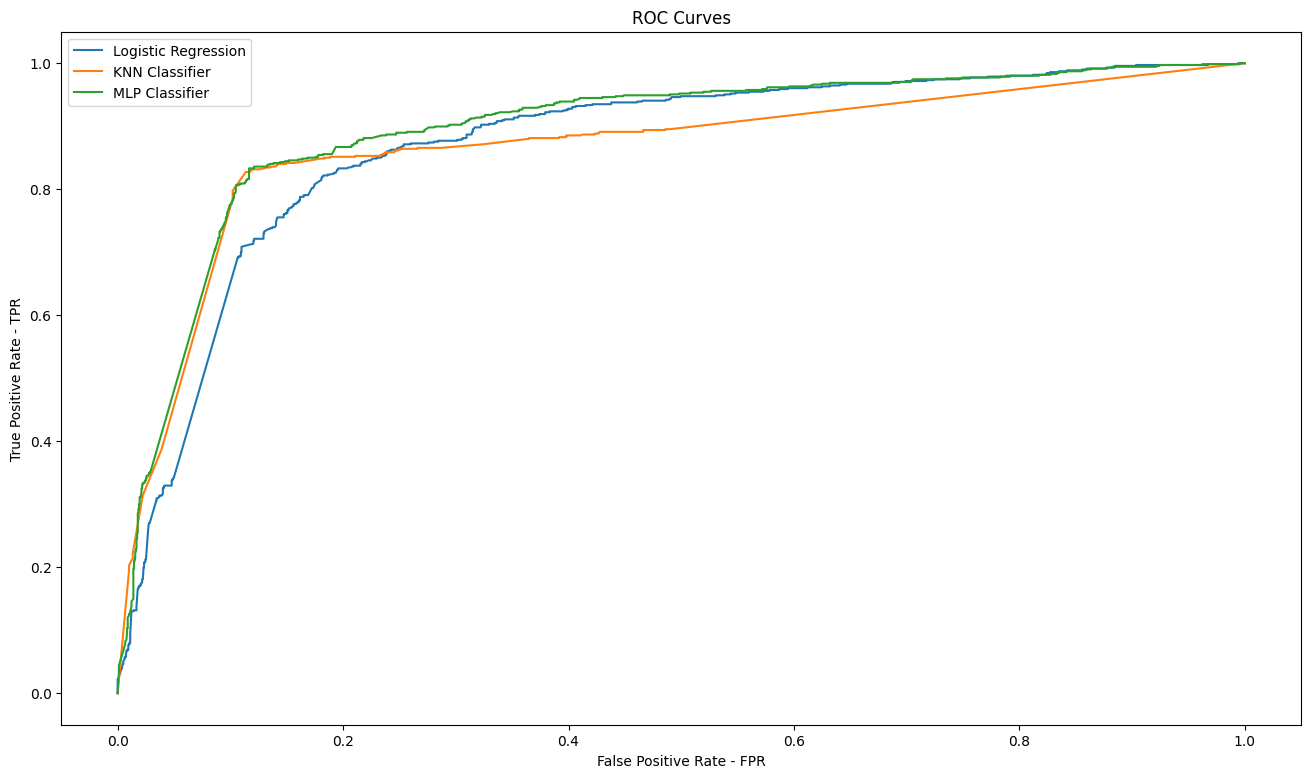

In [62]:
roc_curves_plot(X_test,y_test)

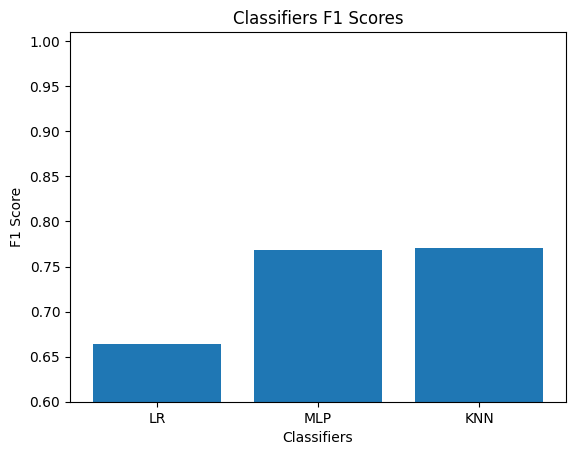

In [48]:
f1s = [f1_score(y_test, lrm.predict(X_test)),
f1_score(y_test, mlp.predict(X_test)),
f1_score(y_test, clf.predict(X_test))]


models = ['LR','MLP','KNN']
data_tuples = list(zip(models,f1s))
data = pd.DataFrame(data_tuples)
data = data.sort_values(1)
plt.bar(data[0], data[1])
plt.ylim(0.60,1.01)
plt.xlabel('Classifiers')
plt.ylabel('F1 Score')
plt.title('Classifiers F1 Scores')
plt.show()

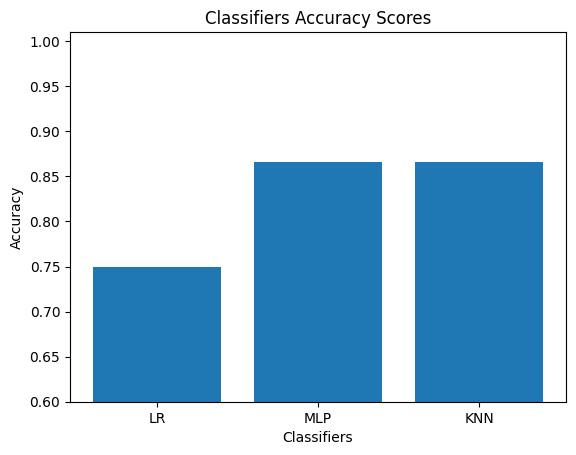

In [49]:
acc = [accuracy_score(y_test, lrm.predict(X_test)),
accuracy_score(y_test, mlp.predict(X_test)),
accuracy_score(y_test, clf.predict(X_test))]


models = ['LR','MLP','KNN']
data_tuples = list(zip(models,acc))
data = pd.DataFrame(data_tuples)
data = data.sort_values(1)
plt.bar(data[0], data[1])
plt.ylim(0.60,1.01)
plt.xlabel('Classifiers')
plt.ylabel('Accuracy')
plt.title('Classifiers Accuracy Scores')
plt.show()